[chess boards](https://reader.elsevier.com/reader/sd/pii/S0012365X07010394?token=4DD81599315BC7BF6F945BD96C06CF56A15816BD8C3C912761E944093CB24841C8FF17A14D5B94ABE801C47F3586C79E&originRegion=eu-west-1&originCreation=20211018125055)

https://www.dcode.fr/mastermind-solver

# Mastermind

The game is played using:

- a decoding board, with a shield at one end covering a row of four large holes, and twelve (or ten, or eight, or six) additional rows containing four large holes next to a set of four small holes;
- code pegs of six different colors (or more; see Variations below), with round heads, which will be placed in the large holes on the board; and
- key pegs, some colored black, some white, which are flat-headed and smaller than the code pegs; they will be placed in the small holes on the board.

## Knuth

- [stack discussion ](https://stackoverflow.com/questions/53826287/donald-knuth-algorithm-for-mastermind-can-we-do-better)[Knuth's paper](https://www.cs.uni.edu/~wallingf/teaching/cs3530/resources/knuth-mastermind.pdf)

- [Knuth's paper](https://www.cs.uni.edu/~wallingf/teaching/cs3530/resources/knuth-mastermind.pdf) 

### Worst case: Five-guess algorithm

In 1977, Donald Knuth demonstrated that the codebreaker can solve the pattern in five moves or fewer, using an algorithm that progressively reduces the number of possible patterns. The algorithm works as follows:

1. Create the set S of 1296 possible codes (1111, 1112 ... 6665, 6666)
2. Start with initial guess 1122 (Knuth gives examples showing that this algorithm using other first guesses such as 1123, 1234 does not win in five tries on every code)
3. Play the guess to get a response of coloured and white pegs.
4. If the response is four colored pegs, the game is won, the algorithm terminates.
5. Otherwise, remove from S any code that would not give the same response if it (the guess) were the code.
6. Apply minimax technique to find a next guess as follows: For each possible guess, that is, any unused code of the 1296 not just those in S, calculate how many possibilities in S would be eliminated for each possible colored/white peg score. The score of a guess is the minimum number of possibilities it might eliminate from S. A single pass through S for each unused code of the 1296 will provide a hit count for each coloured/white peg score found; the coloured/white peg score with the highest hit count will eliminate the fewest possibilities; calculate the score of a guess by using "minimum eliminated" = "count of elements in S" - (minus) "highest hit count". From the set of guesses with the maximum score, select one as the next guess, choosing a member of S whenever possible. (Knuth follows the convention of choosing the guess with the least numeric value e.g. 2345 is lower than 3456. Knuth also gives an example showing that in some cases no member of S will be among the highest scoring guesses and thus the guess cannot win on the next turn, yet will be necessary to assure a win in five.)
7. Repeat from step 3.

---

### Comments 

- His original algorithm gave 5801 (average of 5801/1296 ≈ 4.47608), and the minor improvement gives 5800 (≈ 4.4753).

- Robert W. Irving, “Towards an optimum Mastermind strategy,” Journal of Recreational Mathematics 11 (1978), 81-87 [while staying within the “at most 5” achieves 5664 ⇒ ≈4.37]

- E. Neuwirth, “Some strategies for Mastermind,” Zeitschrift fur Operations Research 26 (1982), B257-B278 [achieves 5658 ⇒ ≈4.3657]

- Kenji Koyama and Tony W. Lai, “An optimal Mastermind strategy,” Journal of Recreational Mathematics 25 (1993), 251-256 [achieves 5626 ⇒ ≈4.34104938]





---


## Knuth

- I'm going to program this but without the minimax step
- I'll just pick the next guess at random from the allowable ones

---


## Structure of program

There are 2 main  steps:

1. Initialize a game
2. Do a loop until the code is found


In [12]:
import numpy as np
import random

In [9]:
np.random.randint(0,high=6,size=4)

array([1, 1, 5, 4])

In [8]:
tt = np.array([0,0,1,1])

In [591]:
code = random.sample(list(range(4)),4)
guess = [0,0,1,1]

## Standard algorithm

convert a number to base 6

In [611]:
def f(x, N=4):  
    L = []
    for k in range(N):
        L.append(x % 6)
        x = x // 6
    return L

In [612]:
f(6**4-1)

[5, 5, 5, 5]

---

## Evaluate the guess - feedback function

The codebreaker tries to guess the pattern, in both order and color, within eight to twelve turns. 

- Each guess is made by placing a row of code pegs on the decoding board. 
- Once placed, the codemaker provides **feedback** by placing from zero to four key pegs in the small holes of the row with the guess. 
    - A colored or black key peg is placed for each code peg from the guess which is correct in both color and position. 
    - A white key peg indicates the existence of a correct color code peg placed in the wrong position.


In [594]:
def score(code, guess):
    # 4 is hardcoded should use len(code)
    rest = [(x,y) for x,y in zip(code, guess) if x != y ]
    if len(rest) == 0: return 4,0
    X,Y = list(zip(* rest))
    coloured = 4 - len(X)
    # this isn't correct but we'll go with it
    white = len(set(X).intersection(set(Y)))
    return coloured, white

In [595]:
my_score = score(code, guess)
my_score

(2, 0)

In [596]:
code, guess

([2, 0, 1, 3], [0, 0, 1, 1])

In [597]:
from itertools import permutations, combinations, chain
 
# Get all permutations of pegs
guesses  = permutations(list(range(4)))

## Baby version of game

- only 4 colors

---

## Initialize game

- choose code
- make first guess
- list of all possible guesses

In [607]:
# Initialize game

code = random.sample(list(range(4)),4)
guess = [0,0,1,1]
guesses  = permutations([0,1, 2, 3])

In [613]:
# Code to go in the loop

my_score = score(code, guess)
guesses = [ x  for x in guesses if score(x, guess) == my_score]
guess = random.choice(guesses)
guesses


[(2, 3, 1, 0)]

---


# Conclusion

there are only 24x15 possibilities so the game is very easy to solve

- on average it takes less than 4 guesses
- maybe I have misunderstood the rules :(

---

# Classic Mastermind 

This is a game without repeats in the code.

## Initialize game

- choose code
- make first guess
- list of all possible guesses

Listing all the guesses is a bit more complicated

In [514]:
pegs = list(range(6))

code = random.sample(pegs,4)
guess = [0,0,1,1]

guesses = [list(permutations(x)) for x in combinations(pegs, 4)]
guesses = list(chain(*guesses))

In [515]:
my_score = score(code, guess)
guesses = [ x  for x in guesses if score(x, guess) == my_score]
guess = random.choice(guesses)
len(guesses)

96

In [13]:
pegs = list(range(6))

---

##  getting jit to work 

I wanted to make an **optimized feedback function**
because it is called a lot and a **bad** one slows down performance **a lot**.

First I tried [numba](https://numba.pydata.org/) 
which has had a lot of press but I've never had much luck with it.

I use [cython](https://cython.org/) to produce compiled **C**.

---

Numba translates Python functions to optimized machine code at runtime using the industry-standard LLVM compiler library. 
Numba-compiled numerical algorithms in Python can approach the speeds of C or FORTRAN.

You don't need to replace the Python interpreter, run a separate compilation step, or even have a C/C++ compiler installed.
Just apply one of the Numba decorators to your Python function, and Numba does the rest.

---

## Writing the function 

It's important to give the **compiler** help
this usually means 

- writing code as if it were **java/c**.
- making loops **explicit**





In [655]:
def py_score(x, y): 

    color = white = 0
    N = len(x)
    # I hate deep indents!
    for i in range(N):
        for j in range(N):
            if x[i] == y[j]:
                if i == j :
                    color += 1
                else:
                    white += 1
    
    return color, white

# Compiling on LLVM

We mark the function for compiling like this.

The function code is the same as in pure python.



In [645]:
from numba import jit

@jit
def numba_score(x, y): 

    color = white = 0
    N = len(x)
    # I hate deep indents!
    for i in range(N):
        for j in range(N):
            if x[i] == y[j]:
                if i == j :
                    color += 1
                else:
                    white += 1
    
    return color, white

---

# So here is the same thing with Cython

In [347]:
%load_ext Cython


The ```score``` function was easy to cross compile to **C** 
by adding **type definitions**.

## Start by the white pegs

In [614]:
%%cython
# cython: profile=True


import cython
@cython.boundscheck(False)

def white(tuple x, tuple y): 
    cdef int N = len(x)
    cdef int tot = 0
    cdef int i, j
    
    for i in range(N):
        for j in range(N):
            if x[i] == y[j] and i != j :
                tot += 1
    return tot


## The whole score function

In [579]:
%%cython
# cython: profile=True


import cython
@cython.boundscheck(False)

def score(tuple x, tuple y): 
    cdef int ll = len(x)
    cdef int color = 0
    cdef int white = 0
    cdef int i,j
    
    for i in range(ll):
        for j in range(ll):
            if x[i] == y[j] and i != j :
                white += 1
    
    for i in range(ll):
        if x[i] == y[i]:
            color += 1
    
    return color, white


In [581]:
%%timeit

score((2,4,1,3), (0,2,1,1))

341 ns ± 15.1 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


---

## Next one is apparently not quicker than the other one 
but when u run it over the whole batch it is 5 times faster


In [621]:
%%cython

import cython
@cython.boundscheck(False)

def score(tuple x, tuple y): 
    cdef int N = len(x)
    cdef int color = 0
    cdef int white = 0
    cdef int i,j
    
    # I hate deep indents!
    for i in range(N):
        for j in range(N):
            if x[i] == y[j]:
                if i == j :
                    color += 1
                else:
                    white += 1
    
    return color, white

In [622]:
%%timeit

score((2,4,1,3), (0,2,1,1))

329 ns ± 13.6 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [551]:
score((2,4,1,3), (2,2,6,1))

(1, 2)

In [657]:
%%timeit

py_score((2,4,1,3), (0,2,1,1))

2.15 µs ± 72.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


# Performance gain

- cython 302 ns ± 9.26 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
- numba 476 ns ± 17 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
- python 2.15 µs ± 72.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)



so  **cython** seems about  7 times faster on this test
and **numba** is pretty good too.
---

In [647]:
import random

pegs = list(range(6))

def f(x, N=4):  
    L = []
    for k in range(N):
        L.append(x % 6)
        x = x // 6
    return tuple(L)


combs = [f(x) for x in range(0,6**4)]

def do_all(score=score):
    data = []

    for x in combs[:]:
        guess = (0,0,1,1)
        guesses = [ t for t in combs]
        for k in range(1,1000):
            my_score = score(x, guess)
            # I don't know if this speeds things up by using _
            guesses = [ _  for _ in guesses if score(_, guess) == my_score]
            guess = random.choice(guesses)
            if len(guesses) < 2: 
                data.append((x,k))
                break
    return data

In [588]:
data  = do_all()
data.sort(key = lambda x : -x[1])
len(data)

---

## Performance 



In [649]:
%%timeit

pp = do_all(score=numba_score)

1.01 s ± 11.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


- cython 693 ms ± 11.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
- numba 1.01 s ± 11.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
- python 4 s ± 55.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

so cython about 5.7 times faster which is a good gain
and will be useful when we do experiments.


In [641]:
4/.7

5.714285714285714

---

# Statistics

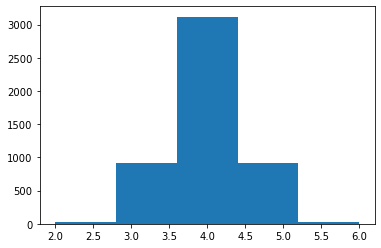

In [642]:
import matplotlib.pyplot as plt

x = pp[200][0]

mm = []            

for tt in range(5000):
    guess = (0,0,1,1)
    guesses = [ t for t in combs]
    for k in range(1,100):
        my_score = score(x, guess)
        guesses = [ t  for t in guesses if score(t, guess) == my_score]
        guess = random.choice(guesses)
        #print(guess)
        if len(guesses) < 2: 
            mm.append(k)
            break
plt.hist(mm,bins=max(mm)-1);

9405